## Imports and useful funcs

In [1]:
verbose = False
verboseprint = print if verbose else lambda *a, **k: None


In [2]:
from torch.utils.data import DataLoader
from Solvation_1.my_nets.Create_dataset import *
from Solvation_1.Vectorizers.vectorizers import *
from Solvation_1.my_nets.LinearNet import *
from Solvation_1.my_nets.net_func import *

## Create dataset

In [3]:
table_v1 = pd.read_csv(project_path('Solvation_1/Tables/table_SS_v1.csv'))
dataset = SS_Dataset(table_v1, 'solvent_macro_props1', 'solute_TESA')
len_data = dataset.__len__()
val_data = len_data // 10
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [len_data - val_data, val_data])

solvent_table = pd.read_table(project_path('Solvation_1/Tables/solvent_test_table_v1.tsv'))
solute_table = pd.read_table(project_path('Solvation_1/Tables/solute_test_table_v1.tsv'))
solvent_test_dataset = SS_Dataset(solvent_table, 'solvent_macro_props1', 'solute_TESA')
solute_test_dataset = SS_Dataset(solute_table, 'solvent_macro_props1', 'solute_TESA')

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

solvent_test_loader = DataLoader(solvent_test_dataset, batch_size=46, shuffle=False)
solute_test_loader = DataLoader(solute_test_dataset, batch_size=64, shuffle=False)

## Train Network

In [4]:
x, y = next(iter(dataset))
x.shape

torch.Size([1, 16])

In [7]:
in_feat = next(iter(dataset))[0].shape[-1]
verbose = False
model = LinearNet3(in_features = in_feat)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())
model.train()

MSE = train(model,train_loader, val_loader, loss_function, optimizer, epochs=120)

100%|██████████| 25/25 [00:00<00:00, 30.63it/s]


epoch 0 -> 0.14153818786144257


100%|██████████| 25/25 [00:00<00:00, 31.68it/s]


epoch 1 -> 0.1015893965959549


100%|██████████| 25/25 [00:00<00:00, 31.52it/s]


epoch 2 -> 0.09488103538751602


100%|██████████| 25/25 [00:00<00:00, 31.92it/s]


epoch 3 -> 0.07969663292169571


100%|██████████| 25/25 [00:00<00:00, 26.57it/s]


epoch 4 -> 0.06828325986862183


100%|██████████| 25/25 [00:00<00:00, 29.86it/s]


epoch 5 -> 0.06393440067768097


100%|██████████| 25/25 [00:00<00:00, 31.12it/s]


epoch 6 -> 0.05925138667225838


100%|██████████| 25/25 [00:00<00:00, 31.80it/s]


epoch 7 -> 0.059520747512578964


100%|██████████| 25/25 [00:00<00:00, 31.51it/s]


epoch 8 -> 0.06641849130392075


100%|██████████| 25/25 [00:00<00:00, 31.87it/s]


epoch 9 -> 0.05331607162952423


100%|██████████| 25/25 [00:00<00:00, 30.78it/s]


epoch 10 -> 0.05190541222691536


100%|██████████| 25/25 [00:00<00:00, 26.86it/s]


epoch 11 -> 0.04793202131986618


100%|██████████| 25/25 [00:00<00:00, 31.37it/s]


epoch 12 -> 0.051979392766952515


100%|██████████| 25/25 [00:00<00:00, 31.55it/s]


epoch 13 -> 0.04821513593196869


100%|██████████| 25/25 [00:00<00:00, 31.67it/s]


epoch 14 -> 0.047336358577013016


100%|██████████| 25/25 [00:00<00:00, 25.64it/s]


epoch 15 -> 0.05426226928830147


100%|██████████| 25/25 [00:00<00:00, 31.32it/s]


epoch 16 -> 0.04816513508558273


100%|██████████| 25/25 [00:00<00:00, 31.80it/s]


epoch 17 -> 0.04455157369375229


100%|██████████| 25/25 [00:00<00:00, 25.44it/s]


epoch 18 -> 0.04374818131327629


100%|██████████| 25/25 [00:00<00:00, 31.35it/s]


epoch 19 -> 0.044003285467624664


100%|██████████| 25/25 [00:00<00:00, 32.01it/s]


epoch 20 -> 0.042902473360300064


100%|██████████| 25/25 [00:00<00:00, 30.54it/s]


epoch 21 -> 0.05190286412835121


100%|██████████| 25/25 [00:01<00:00, 24.60it/s]


epoch 22 -> 0.04627387225627899


100%|██████████| 25/25 [00:00<00:00, 30.95it/s]


epoch 23 -> 0.04412399232387543


100%|██████████| 25/25 [00:00<00:00, 26.19it/s]


epoch 24 -> 0.04415593296289444


100%|██████████| 25/25 [00:00<00:00, 30.87it/s]


epoch 25 -> 0.06363099813461304


100%|██████████| 25/25 [00:00<00:00, 31.56it/s]


epoch 26 -> 0.043654974550008774


100%|██████████| 25/25 [00:00<00:00, 25.45it/s]


epoch 27 -> 0.0382906049489975


100%|██████████| 25/25 [00:00<00:00, 31.47it/s]


epoch 28 -> 0.041878558695316315


100%|██████████| 25/25 [00:00<00:00, 30.92it/s]


epoch 29 -> 0.03923667594790459


100%|██████████| 25/25 [00:00<00:00, 25.66it/s]


epoch 30 -> 0.03807426989078522


100%|██████████| 25/25 [00:00<00:00, 31.54it/s]


epoch 31 -> 0.037952106446027756


100%|██████████| 25/25 [00:00<00:00, 28.52it/s]


epoch 32 -> 0.0449024997651577


100%|██████████| 25/25 [00:00<00:00, 30.05it/s]


epoch 33 -> 0.04449672996997833


100%|██████████| 25/25 [00:00<00:00, 31.03it/s]


epoch 34 -> 0.03863178566098213


100%|██████████| 25/25 [00:00<00:00, 25.12it/s]


epoch 35 -> 0.040550876408815384


100%|██████████| 25/25 [00:00<00:00, 31.21it/s]


epoch 36 -> 0.04061851277947426


100%|██████████| 25/25 [00:00<00:00, 26.73it/s]


epoch 37 -> 0.04048270732164383


100%|██████████| 25/25 [00:00<00:00, 30.86it/s]


epoch 38 -> 0.034941356629133224


100%|██████████| 25/25 [00:00<00:00, 29.81it/s]


epoch 39 -> 0.035418760031461716


100%|██████████| 25/25 [00:00<00:00, 31.21it/s]


epoch 40 -> 0.03637996315956116


100%|██████████| 25/25 [00:00<00:00, 30.86it/s]


epoch 41 -> 0.036504678428173065


100%|██████████| 25/25 [00:00<00:00, 28.79it/s]


epoch 42 -> 0.036383140832185745


100%|██████████| 25/25 [00:00<00:00, 31.31it/s]


epoch 43 -> 0.0328122042119503


100%|██████████| 25/25 [00:01<00:00, 25.00it/s]


epoch 44 -> 0.03416205942630768


100%|██████████| 25/25 [00:00<00:00, 30.16it/s]


epoch 45 -> 0.03639037162065506


100%|██████████| 25/25 [00:00<00:00, 29.57it/s]


epoch 46 -> 0.03377322107553482


100%|██████████| 25/25 [00:00<00:00, 30.60it/s]


epoch 47 -> 0.03602468594908714


100%|██████████| 25/25 [00:00<00:00, 30.82it/s]


epoch 48 -> 0.0327955037355423


100%|██████████| 25/25 [00:00<00:00, 29.08it/s]


epoch 49 -> 0.04397889971733093


100%|██████████| 25/25 [00:00<00:00, 31.16it/s]


epoch 50 -> 0.03154795616865158


100%|██████████| 25/25 [00:00<00:00, 27.78it/s]


epoch 51 -> 0.03505706414580345


100%|██████████| 25/25 [00:00<00:00, 31.44it/s]


epoch 52 -> 0.03126268833875656


100%|██████████| 25/25 [00:00<00:00, 26.93it/s]


epoch 53 -> 0.04040883854031563


100%|██████████| 25/25 [00:00<00:00, 29.08it/s]


epoch 54 -> 0.030387025326490402


100%|██████████| 25/25 [00:00<00:00, 30.90it/s]


epoch 55 -> 0.036872029304504395


100%|██████████| 25/25 [00:00<00:00, 30.70it/s]


epoch 56 -> 0.03479861840605736


100%|██████████| 25/25 [00:00<00:00, 27.56it/s]


epoch 57 -> 0.03438085317611694


100%|██████████| 25/25 [00:00<00:00, 29.25it/s]


epoch 58 -> 0.03219972923398018


100%|██████████| 25/25 [00:00<00:00, 31.28it/s]


epoch 59 -> 0.02951759845018387


100%|██████████| 25/25 [00:00<00:00, 30.62it/s]


epoch 60 -> 0.03235134482383728


100%|██████████| 25/25 [00:00<00:00, 25.98it/s]


epoch 61 -> 0.031652241945266724


100%|██████████| 25/25 [00:00<00:00, 31.47it/s]


epoch 62 -> 0.03966406732797623


100%|██████████| 25/25 [00:00<00:00, 28.87it/s]


epoch 63 -> 0.03465135022997856


100%|██████████| 25/25 [00:00<00:00, 30.56it/s]


epoch 64 -> 0.029160255566239357


100%|██████████| 25/25 [00:01<00:00, 24.86it/s]


epoch 65 -> 0.03371959179639816


100%|██████████| 25/25 [00:00<00:00, 26.59it/s]


epoch 66 -> 0.06227685138583183


100%|██████████| 25/25 [00:00<00:00, 27.65it/s]


epoch 67 -> 0.041101545095443726


100%|██████████| 25/25 [00:00<00:00, 29.19it/s]


epoch 68 -> 0.030245602130889893


100%|██████████| 25/25 [00:00<00:00, 26.79it/s]


epoch 69 -> 0.03484322130680084


100%|██████████| 25/25 [00:00<00:00, 31.15it/s]


epoch 70 -> 0.02665013074874878


100%|██████████| 25/25 [00:00<00:00, 29.55it/s]


epoch 71 -> 0.03414010629057884


100%|██████████| 25/25 [00:00<00:00, 29.50it/s]


epoch 72 -> 0.02988649532198906


100%|██████████| 25/25 [00:00<00:00, 31.11it/s]


epoch 73 -> 0.02876397594809532


100%|██████████| 25/25 [00:00<00:00, 30.86it/s]


epoch 74 -> 0.028802957385778427


100%|██████████| 25/25 [00:00<00:00, 30.35it/s]


epoch 75 -> 0.03199782595038414


100%|██████████| 25/25 [00:00<00:00, 26.45it/s]


epoch 76 -> 0.03127521649003029


100%|██████████| 25/25 [00:00<00:00, 30.75it/s]


epoch 77 -> 0.027702394872903824


100%|██████████| 25/25 [00:00<00:00, 29.33it/s]


epoch 78 -> 0.028171133249998093


100%|██████████| 25/25 [00:00<00:00, 26.73it/s]


epoch 79 -> 0.03183111548423767


100%|██████████| 25/25 [00:00<00:00, 28.24it/s]


epoch 80 -> 0.03125471994280815


100%|██████████| 25/25 [00:00<00:00, 30.08it/s]


epoch 81 -> 0.030147068202495575


100%|██████████| 25/25 [00:00<00:00, 28.36it/s]


epoch 82 -> 0.02763136476278305


100%|██████████| 25/25 [00:00<00:00, 28.01it/s]


epoch 83 -> 0.02969220280647278


100%|██████████| 25/25 [00:00<00:00, 30.95it/s]


epoch 84 -> 0.025817900896072388


100%|██████████| 25/25 [00:00<00:00, 28.71it/s]


epoch 85 -> 0.029360584914684296


100%|██████████| 25/25 [00:00<00:00, 30.53it/s]


epoch 86 -> 0.028013216331601143


100%|██████████| 25/25 [00:00<00:00, 29.77it/s]


epoch 87 -> 0.02832203358411789


100%|██████████| 25/25 [00:00<00:00, 28.33it/s]


epoch 88 -> 0.03757989779114723


100%|██████████| 25/25 [00:00<00:00, 28.36it/s]


epoch 89 -> 0.03456597775220871


100%|██████████| 25/25 [00:00<00:00, 31.30it/s]


epoch 90 -> 0.031004421412944794


100%|██████████| 25/25 [00:00<00:00, 27.08it/s]


epoch 91 -> 0.029164105653762817


100%|██████████| 25/25 [00:00<00:00, 29.52it/s]


epoch 92 -> 0.026468973606824875


100%|██████████| 25/25 [00:00<00:00, 25.73it/s]


epoch 93 -> 0.025309743359684944


100%|██████████| 25/25 [00:00<00:00, 30.91it/s]


epoch 94 -> 0.024608852341771126


100%|██████████| 25/25 [00:00<00:00, 25.11it/s]


epoch 95 -> 0.02567252703011036


100%|██████████| 25/25 [00:00<00:00, 29.83it/s]


epoch 96 -> 0.028942877426743507


100%|██████████| 25/25 [00:00<00:00, 25.19it/s]


epoch 97 -> 0.03110213205218315


100%|██████████| 25/25 [00:00<00:00, 25.55it/s]


epoch 98 -> 0.04109650477766991


100%|██████████| 25/25 [00:00<00:00, 30.68it/s]


epoch 99 -> 0.029295217245817184


100%|██████████| 25/25 [00:00<00:00, 25.20it/s]


epoch 100 -> 0.028867419809103012


100%|██████████| 25/25 [00:00<00:00, 29.58it/s]


epoch 101 -> 0.029245804995298386


100%|██████████| 25/25 [00:00<00:00, 29.67it/s]


epoch 102 -> 0.024864424020051956


100%|██████████| 25/25 [00:00<00:00, 30.55it/s]


epoch 103 -> 0.02528338134288788


100%|██████████| 25/25 [00:00<00:00, 26.32it/s]


epoch 104 -> 0.026598535478115082


100%|██████████| 25/25 [00:00<00:00, 30.71it/s]


epoch 105 -> 0.027145983651280403


100%|██████████| 25/25 [00:00<00:00, 27.54it/s]


epoch 106 -> 0.022381916642189026


100%|██████████| 25/25 [00:00<00:00, 29.08it/s]


epoch 107 -> 0.02951737679541111


100%|██████████| 25/25 [00:00<00:00, 30.86it/s]


epoch 108 -> 0.02628030814230442


100%|██████████| 25/25 [00:01<00:00, 24.20it/s]


epoch 109 -> 0.029416242614388466


100%|██████████| 25/25 [00:01<00:00, 23.04it/s]


epoch 110 -> 0.031435828655958176


100%|██████████| 25/25 [00:00<00:00, 27.09it/s]


epoch 111 -> 0.0272821057587862


100%|██████████| 25/25 [00:01<00:00, 23.92it/s]


epoch 112 -> 0.02594601735472679


100%|██████████| 25/25 [00:01<00:00, 24.74it/s]


epoch 113 -> 0.027091002091765404


100%|██████████| 25/25 [00:00<00:00, 30.40it/s]


epoch 114 -> 0.030718158930540085


100%|██████████| 25/25 [00:01<00:00, 24.55it/s]


epoch 115 -> 0.02419748343527317


100%|██████████| 25/25 [00:00<00:00, 30.19it/s]


epoch 116 -> 0.024447323754429817


100%|██████████| 25/25 [00:00<00:00, 28.33it/s]


epoch 117 -> 0.02772757038474083


100%|██████████| 25/25 [00:01<00:00, 23.43it/s]


epoch 118 -> 0.03204425424337387


100%|██████████| 25/25 [00:01<00:00, 24.65it/s]

epoch 119 -> 0.02731885015964508


solvent water
solute ethanol


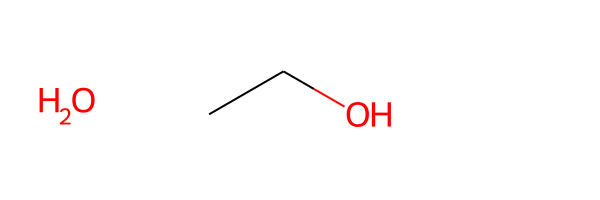

predicted -5.472492218017578, true -5.010000228881836


In [8]:
beautiful_sample(model, 'water', 'ethanol')

solvent dichloroethane
solute m-hydroxybenzaldehyde


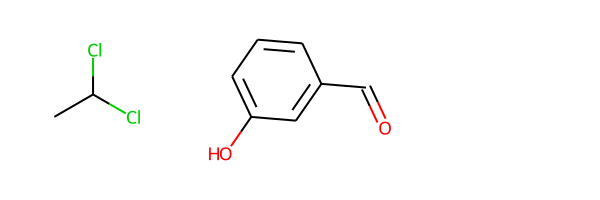

predicted -10.726136207580566, true -10.109999656677246


In [9]:
beautiful_sample(model, 'dichloroethane', 'm-hydroxybenzaldehyde')